**<font size=6>Basic analysis of the Google Play Store dataset</font>**

![imglink](https://cdn.freebiesupply.com/logos/large/2x/google-play-logo-png-transparent.png)


<br>
**A Welcome message**<br>
*Hi! This is my very first project here, needless to say that I am impressed with the plethora of the datasets and the wonderful kernels that you guys create! I am relativelly new in the Data Science, so I would sincerely appreciate if you share your opinion and perhaps correct any mistakes I might have along the way. I am ready to set sail!*
<br><br>
**<font size=5>Introduction</font>**
<br>
<font size=3>Creating a satisfying android application is nowadays something feasible for all, both programmers and non-programmers as well. This happens because developing apps in the Android Studio is one of the most discussed things online and you can find solutions for literally everything. Furthermore, for a non-programmer's case, there are plenty of programs to create applications for Android using simplified programming language, in a much more accessible way for the developer and there are even more programs which use a graphical environment, without the need of coding! </font>
**<br><br><font size=3>Then, what does it take for an android app to be considered successful?</font><br><br>**
<font size=3>First of all, what the word successful actually means? An Android application would be characterized as successful if it has an amount greater than a hundred thousand downloads. When the application is ready and uploaded on Play Store, advertisement is the primary factor for a successful application.</font>
**<br><br><font size=3>But, what should we take into account before the application is completed?</font><br><br>**
 <font size=3>Here is where a Data Scientist comes! Having a large amount of application data of Play Store can be very usefull to analyse why and how some applications succeed and others do not. So, the "Google Play Store App" dataset is a very good start to enable you to see things you may have to add or remove in your current developing Android application! Let's start!  </font>



**<font size=5>Initialization</font>**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("googleplaystore.csv")


<font size=3>Take a glimpse in the dataset</font>

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
data.count()

App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64

**<font size=5>Data Cleaning</font>**

<font size=3>First of, while I was looking the dataset, I realized something is going on in the 'Categories' column.</font>

In [9]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

<font size=3>That '1.9 Category'  is a wrong value.  So I have to see in which rows '1.9' corresponds to.</font>

In [10]:
data[data['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


<font size=3>The easy way is to just drop this row! But let's give it a try!</font>

In [11]:
data.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

<font size=3>Watching this row it seems that if we shift from 'Categories' and below, the values will make sense.</font>

In [12]:
data.loc[10472]=data.loc[10472].shift() # hole shift
#swap fisrt and second column
data['App'].loc[10472] = data['Category'].loc[10472]
data['Category'].loc[10472] = np.nan
data.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                                19
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

<font size=3>Now it's time to clean the dataset from indentical records.</font>

In [13]:
data[data.duplicated()].count()

App               483
Category          483
Rating            474
Reviews           483
Size              483
Installs          483
Type              483
Price             483
Content Rating    483
Genres            483
Last Updated      483
Current Ver       483
Android Ver       483
dtype: int64

In [14]:
data=data.drop_duplicates()
data[data.duplicated()].count()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

<font size=3>After this point, we will convert the numeric columns into integers or floats accordingly.</font>

In [15]:
data.dtypes

App               object
Category          object
Rating            object
Reviews           object
Size              object
Installs          object
Type              object
Price             object
Content Rating    object
Genres            object
Last Updated      object
Current Ver       object
Android Ver       object
dtype: object

<font size=3>We can visually see that all the data is object type. The desirable columns to convert are: </font>**<font size=3>Rating, </font>** **<font size=3>Reviews, </font>** **<font size=3>Size, </font>** **<font size=3>Installs, </font>** <font size=3> and </font> **<font size=3>Price.</font>** <font size=3> I will not conclude the </font> **<font size=3>Last Updated, </font>** **<font size=3>Current Ver</font>** <font size=3> and </font> **<font size=3>Android Ver </font>** <font size=3>in this project   :( </font>

<font size=4>&#8195; &#8195;  &#8195; &#8195; &#8194; 1. Rating</font>

In [16]:
data['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

In [17]:
data['Rating'] = pd.to_numeric(data['Rating'],errors='coerce')

<font size=4>&#8195; &#8195;  &#8195; &#8195; &#8194; 2. Reviews</font>

In [18]:
data['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [19]:
data['Reviews'] = pd.to_numeric(data['Reviews'],errors='coerce')

<font size=4>&#8195; &#8195;  &#8195; &#8195; &#8194; 3. Size</font>

In [20]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

<font size=3>The sizes will be converted into Kilobytes.  Those of which are equal to 'Varies with device' will be turned into 'NaN', because it may cause  false fluctuations in Visualization. Let's be happy with what we have!</font>

In [21]:
data['Size'].replace('Varies with device', np.nan, inplace = True ) 
data['Size']=data['Size'].str.extract(r'([\d\.]+)', expand=False).astype(float) * \
    data['Size'].str.extract(r'([kM]+)', expand=False).fillna(1).replace(['k','M'],[1,1000]).astype(int)

<font size=4>&#8195; &#8195;  &#8195; &#8195; &#8194; 4. Installs</font>

In [22]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

<font size=3> We will just ignore '+' symbol and remove commas.</font>

In [23]:
data['Installs']=data['Installs'].str.replace(r'\D','').astype(float)

<font size=4> &#8195; &#8195;  &#8195; &#8195; &#8194; 5. Price</font>

In [24]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [25]:
data['Price']=data['Price'].str.replace('$','').astype(float)

**<font size=5>Visualization</font>**

<font size=3>As I already mentioned, the more downloads (Installations) a mobile application has, the more successful it is considered. Therefore, this project focuses on the Installations and how other factors can affect them. </font> 
<br>**<font size=3> My goal is to make an app with more that 100,000 downloads.</font>**

<font size=4>&#8195; &#8195;  &#8195; &#8195; &#8194; 1. Category</font>

<font size=3>To begin with, let's see how many applications we have in each Category.</font>

Text(0.5, 1.0, 'Total apps of each Category')

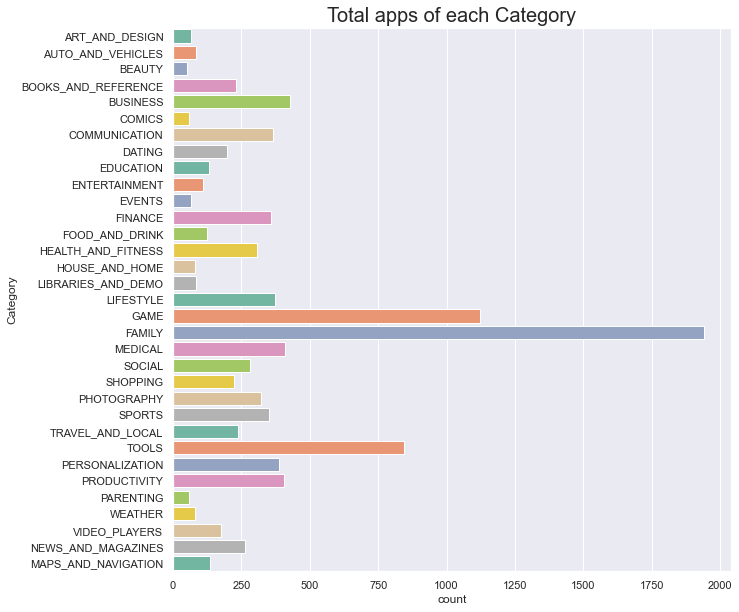

In [26]:
plt.figure(figsize=(10,10))
g = sns.countplot(y="Category",data=data, palette = "Set2")
plt.title('Total apps of each Category',size = 20)

<font size=3>We can see that Family, Game and Tools are the most frequent Categories in our dataset. But what happens with the Installs in each Category?</font>

Text(0.5, 1.0, 'Installations in each Category')

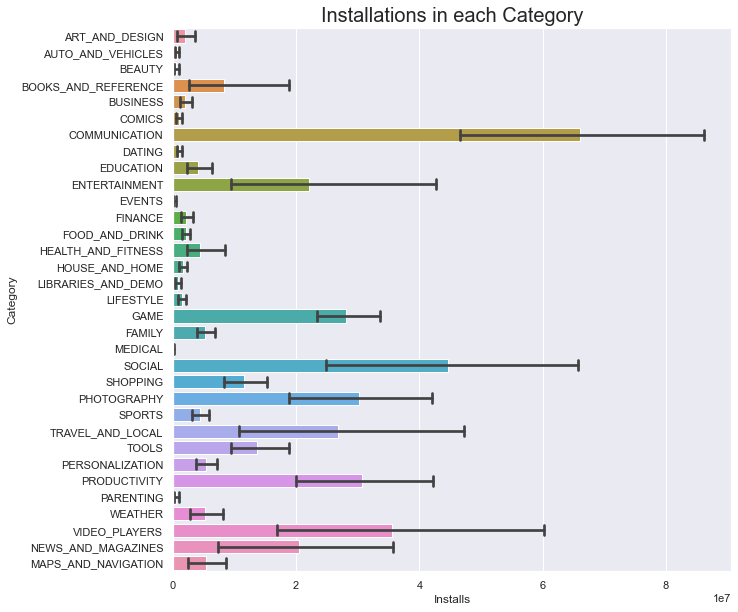

In [27]:
plt.figure(figsize=(10,10))
g = sns.barplot(x="Installs", y="Category", data=data, capsize=.6)
plt.title('Installations in each Category',size = 20)

<font size=3>Of course! Communication and Social Categories have the most downloads! Let's see which are the Categories of our interest.</font>

In [28]:
data[data[['Installs']].mean(axis=1)>1e5]['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

<font size=4>&#8195; &#8195;  &#8195; &#8195; &#8194; 2. Rating</font>

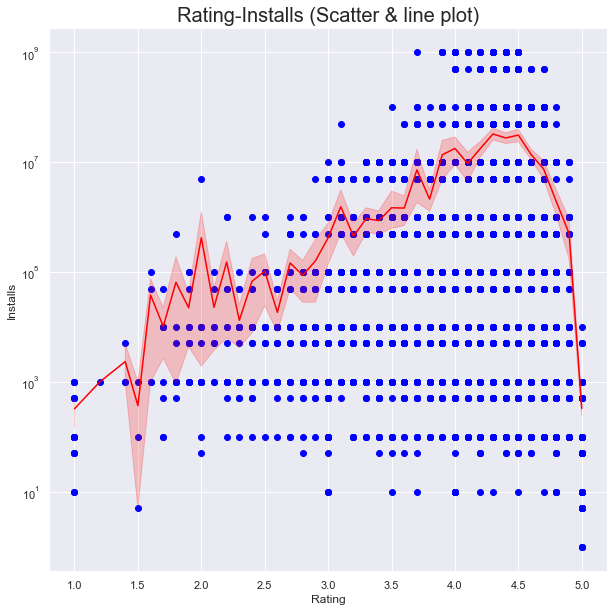

In [29]:
plt.figure(figsize=(10,10))
plt.scatter( x=data['Rating'], y=data['Installs'] , color = 'blue')
g = sns.lineplot(x="Rating", y="Installs",color="red", data=data) 
plt.yscale('log')
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.title('Rating-Installs (Scatter & line plot)',size = 20)
plt.show()
    


<font size=3>So it seems that a Rating between 2.8 and 4.8 is desirable. But over 4.8 the Installations drop significantly and that makes sense. Imagine a Youtube video with millions of views. There is no way to have 100% likes. But a video with only a few views (as many as youtuber's friends and relatives :P ), is quite possible to have zero dislikes. That is what exactly happens with such high Ratings!</font>

<font size=4>&#8195; &#8195;  &#8195; &#8195; &#8194; 3. Reviews</font>

Text(0.5, 1.0, 'Reviews-Installs ')

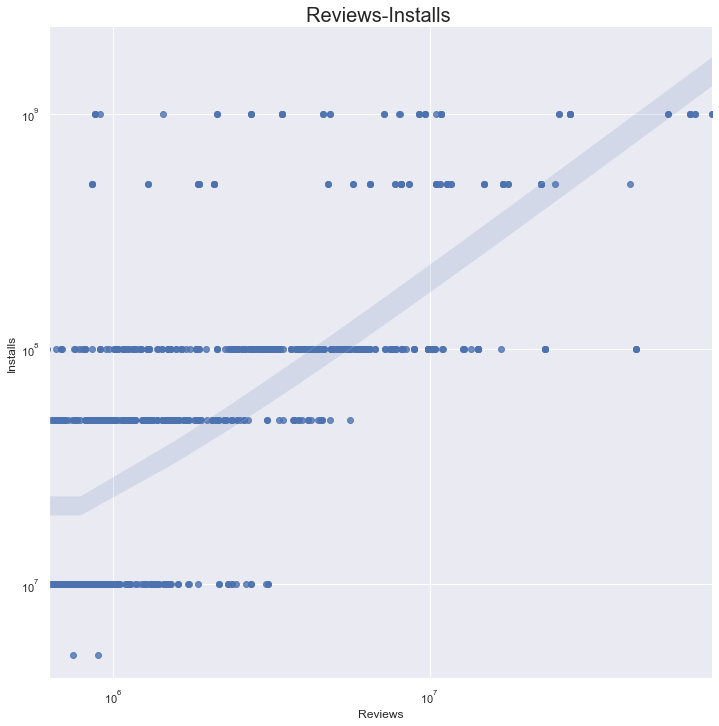

In [30]:
g = sns.lmplot(y="Installs",x="Reviews", data=data,size=(10))
plt.xscale('log')
plt.yscale('log')
plt.title('Reviews-Installs ',size = 20)

<font size=3>Here is the correlation we are searching for! The Reviews, unlike Rating, describe the Installs in a linear way. </font>

<font size=4>&#8195; &#8195;  &#8195; &#8195; &#8194; 4. Size</font>

Text(0.5, 1.0, 'Installs-Size(kilobyte) ')

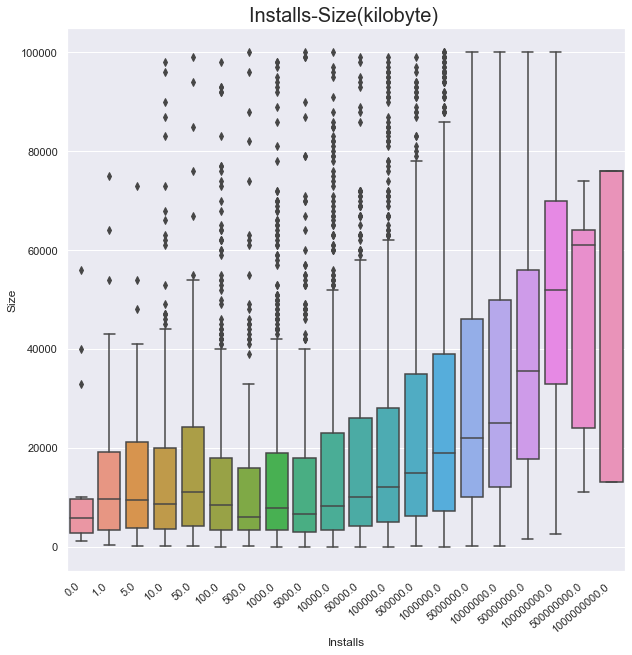

In [31]:
plt.figure(figsize=(10,10))
g = sns.boxplot(x="Installs", y="Size", data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
plt.title('Installs-Size(kilobyte) ',size = 20)

<font size=3>After viewing this graph, we can conclude that the more Installs are increase, the Size increases as well. But why is that? One of the most appealing things in an app is its appearance. Realistic pictures, 3D models, dazzling animations and beautiful music make up for a more pleasant experience to the user. But all of the above seriously increase the size of the app . So this graph basically says:</font> *<font size=3> Your app has to be beautiful!</font>*

<font size=4>&#8195; &#8195;  &#8195; &#8195; &#8194; 5. Content Rating</font>

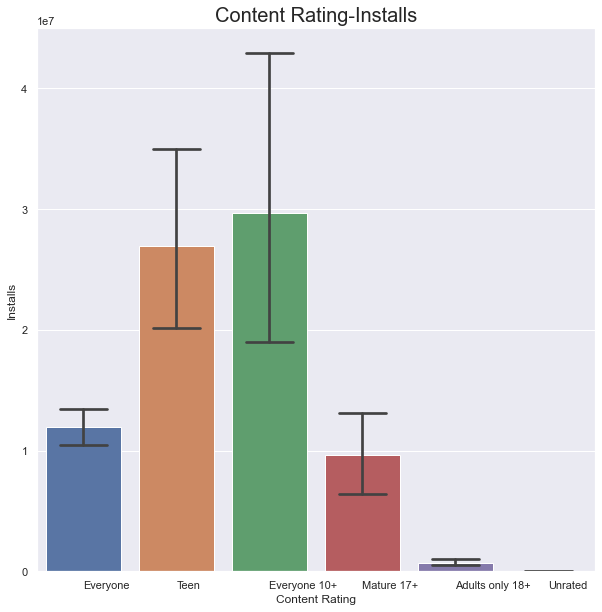

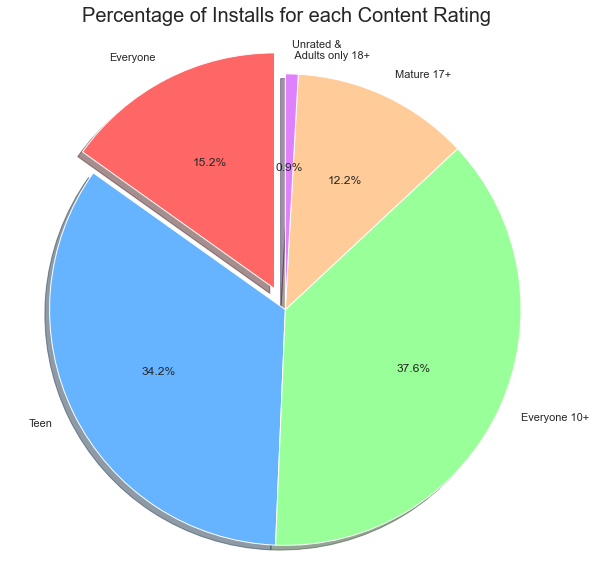

In [32]:
plt.figure(figsize=(10,10))
ax = sns.barplot(y="Installs", x="Content Rating", data=data, capsize=.5)
ax.set_xticklabels(ax.get_xticklabels(),  ha="left")
plt.title('Content Rating-Installs',size = 20)

##pie plot
labels=data['Content Rating'].unique()
explode = (0.1, 0, 0, 0, 0)
size=list()
for content in labels:
    size.append(data[data['Content Rating']==content]['Installs'].mean())

##merging Unrated & Adults 
labels[4] = 'Unrated &\n Adults only 18+'
labels = np.delete(labels,5)
size[4]=size[4]+size[5]
size.pop()

plt.figure(figsize=(10,10))
colors = ['#ff6666','#66b3ff','#99ff99','#ffcc99', '#df80ff']
plt.pie(size, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')
plt.title('Percentage of Installs for each Content Rating',size = 20)
plt.show()

<font size=3>It is obvious that the applications which are permissible to children, have the most Downloads.</font>

<font size=4>&#8195; &#8195;  &#8195; &#8195; &#8194;  6. Type and Price</font>

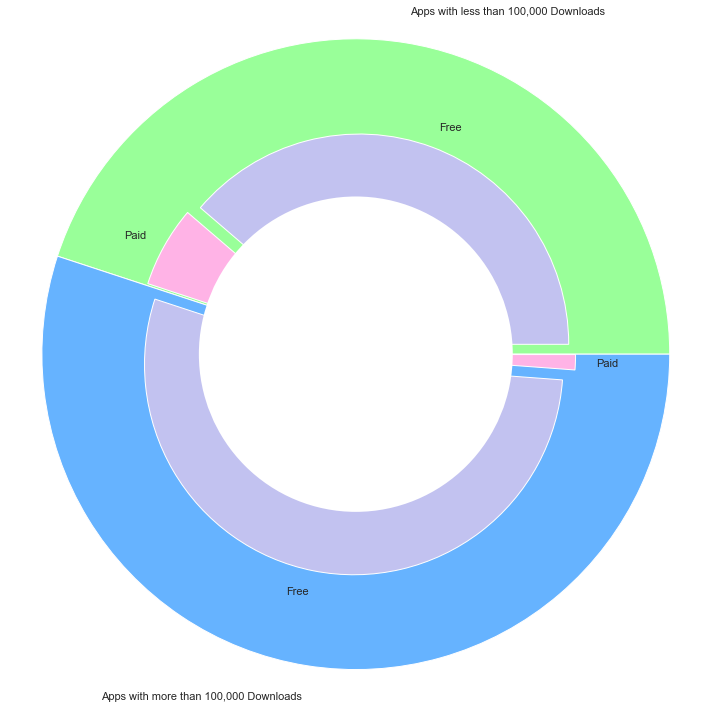

In [33]:
plt.figure(figsize=(10,10))

labels=['Apps with less than 100,000 Downloads', 'Apps with more than 100,000 Downloads']
size=list()
size.append(data['App'][data['Installs']<1e5].count()) 
size.append(data['App'][data['Installs']>=1e5].count()) 

labels_inner=['Free', 'Paid', 'Free', 'Paid']
size_inner=list()
size_inner.append(data['Type'][data['Type']=='Free'][data['Installs']<1e5].count()) 
size_inner.append(data['Type'][data['Type']=='Paid'][data['Installs']<1e5].count()) 
size_inner.append(data['Type'][data['Type']=='Free'][data['Installs']>=1e5].count())
size_inner.append(data['Type'][data['Type']=='Paid'][data['Installs']>=1e5].count()) 

colors = ['#99ff99', '#66b3ff']
colors_inner = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']

explode = (0,0) 
explode_inner = (0.1,0.1,0.1,0.1)

#outer pie
plt.pie(size,explode=explode,labels=labels, radius=3, colors=colors)
#inner pie
plt.pie(size_inner,explode=explode_inner,labels=labels_inner, radius=2, colors=colors_inner)
       
#Draw circle
centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()
plt.show()

<font size=3>This figure, at first, shows that the number of apps with more than 100,000 Downloads is about the same as the number of apps with less. After that we cannot bring into any conclusion on how the Type affects the number of Installs because Paid apps are much more less in number than the Free apps. Thus, I would choose to make a Free application like the majority does!</font> 

Text(0.5, 1.0, 'Price (0-10$) - Installs')

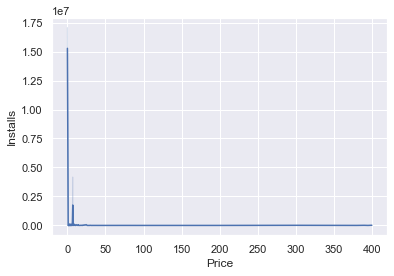

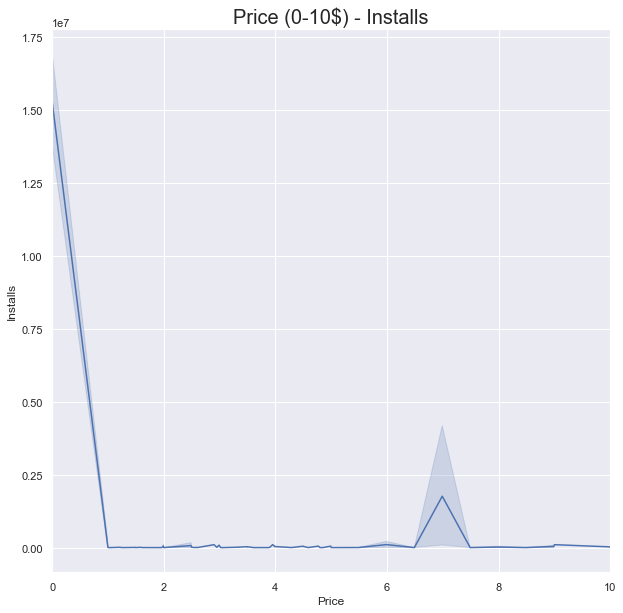

In [34]:
g = sns.lineplot(x="Price", y="Installs", data=data)

plt.figure(figsize=(10,10))
g = sns.lineplot(x="Price", y="Installs", data=data)
g.set(xlim=(0, 10))
plt.title('Price (0-10$) - Installs',size = 20)

<font size=3>But, if you are planning on charging it, just sell it below 1 dolar!  </font>

<font size=4>&#8195; &#8195;  &#8195; &#8195; &#8194;  7. Name</font>

Text(0.5, 1.0, 'Top 50 most frequently occuring words')

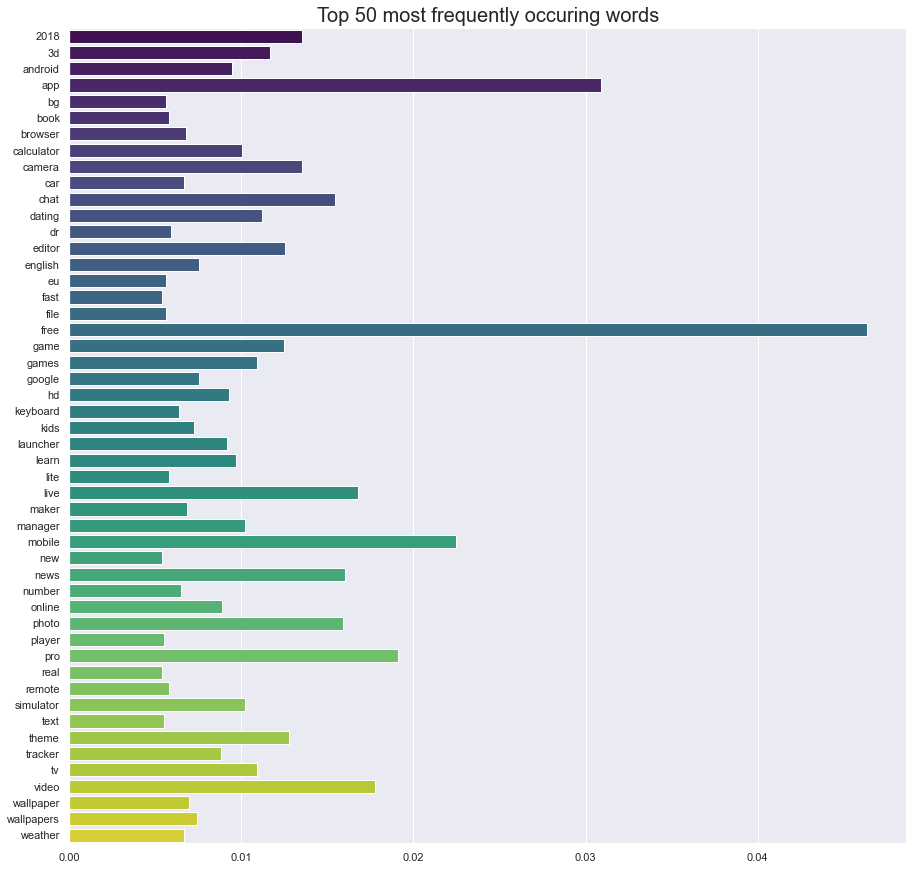

In [35]:
corpus=list(data['App'])
vectorizer = CountVectorizer(max_features=50, stop_words='english')
X = vectorizer.fit_transform(corpus)
names=vectorizer.get_feature_names()
values=X.toarray().mean(axis=0)

plt.figure(figsize=(15,15))
sns.barplot(x=values, y=names, palette="viridis")
plt.title('Top 50 most frequently occuring words',size = 20)

**<font size=4> So we got to the end! Just name it and start developing!!!</font>**